In [1]:
import numpy as np
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
%matplotlib inline

In [2]:
def rho_green_light(x,rho_light):
    rho = np.zeros_like(x)
    mask = np.where(x<2)
    rho[mask] = x[mask]*2.5
    return rho
def rho_red_light(nx,rho_max,rho_in):
    rho = rho_max*np.ones(nx)
    rho[:int((nx-1)*3/4.)] = rho_in
    return rho

In [3]:
nx = 81
nt = 160
dx = 4.0/(nx-1)
x = np.linspace(0,4,nx)
rho_in = 5.
rho_max = 10.
u_max = 1.
rho_light = 5.
rho = rho_green_light(x,rho_light)
rho_red = rho_red_light(nx,rho_max,rho_in)

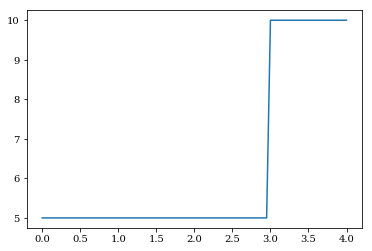

In [4]:
pyplot.plot(x,rho_red)

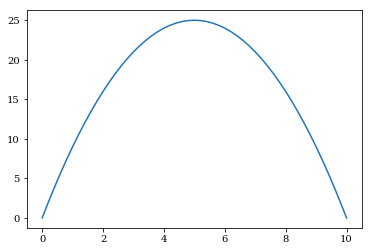

In [5]:
def computeF(u_max,rho_max,rho):
    return u_max*rho*(1-rho/rho_max)
rho_range = np.linspace(0,10,51)
pyplot.plot(rho_range,computeF(10,10,rho_range))

In [10]:
def ftbs(rho,nt,dt,dx,rho_max,u_max):
    rho_n = np.zeros((nt,len(rho)))
    rho_n[0,:] = rho.copy()
    
    for t in range(1,nt):
        F = computeF(u_max,rho_max,rho)
        rho_n[t,1:] = rho[1:] - dt/dx*(F[1:]-F[:-1])
        rho_n[t,0] = rho[0]
        rho_n[t,-1] = rho_max
        rho = rho_n[t].copy()
    return rho_n        

In [11]:
sigma = 1.
dt=sigma*dx
rho_n = ftbs(rho,nt,dt,dx,rho_max,u_max)

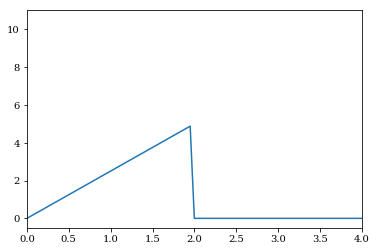

In [12]:
from matplotlib import animation
from IPython.display import HTML
fig = pyplot.figure()
ax = pyplot.axes(xlim=(0,4),ylim=(-0.5,11))
line, = ax.plot([],[])
def animate(data):
    line.set_data(x,data)
    return line,
anim = animation.FuncAnimation(fig,animate,frames=rho_n,interval=50)
HTML(anim.to_html5_video())